## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [3]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12746105214275811992, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8966584300421730522
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Let's use the data we processed in the titanic assigment and load it below.

In [6]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [7]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


In [8]:
titanic.isnull().sum()

Survived      0
SibSp         0
Parch         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Split the data into train and test with 20% of data in test.

In [9]:
# Answer below
from sklearn.model_selection import train_test_split

X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [10]:
# Answer below
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [11]:
# Answer below:
sgd = SGD(lr=0.05)

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [12]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 2s 57ms/step - loss: 0.6968 - accuracy: 0.4519 - val_loss: 0.6840 - val_accuracy: 0.6124
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.6720 - val_loss: 0.6736 - val_accuracy: 0.6067
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.6887 - val_loss: 0.6653 - val_accuracy: 0.6067
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6535 - accuracy: 0.6660 - val_loss: 0.6559 - val_accuracy: 0.6067
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6368 - accuracy: 0.6939 - val_loss: 0.6459 - val_accuracy: 0.6180
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6322 - accuracy: 0.6739 - val_loss: 0.6353 - val_accuracy: 0.6292
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6153 - accuracy: 0.6998 - val_loss: 0.6228 - val_accuracy: 0.6742
Epoch 8/50
8/8 [=================

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [13]:
# Answer below:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=500, verbose=1)


Epoch 1/500
8/8 [==============================] - 0s 14ms/step - loss: 0.4078 - accuracy: 0.8312 - val_loss: 0.5116 - val_accuracy: 0.7416
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4129 - accuracy: 0.8214 - val_loss: 0.4980 - val_accuracy: 0.7472
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4073 - accuracy: 0.8425 - val_loss: 0.4965 - val_accuracy: 0.7472
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4070 - accuracy: 0.8354 - val_loss: 0.4946 - val_accuracy: 0.7472
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4094 - accuracy: 0.8340 - val_loss: 0.5208 - val_accuracy: 0.7640
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4070 - accuracy: 0.8228 - val_loss: 0.5109 - val_accuracy: 0.7472
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4082 - accuracy: 0.8326 - val_loss: 0.5231 - val_accuracy: 0.7416
Epoch 8/500
8/8 [=========

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [14]:
# Answer below:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=200, epochs=200, verbose=1)


Epoch 1/200
4/4 [==============================] - 0s 27ms/step - loss: 0.3577 - accuracy: 0.8481 - val_loss: 0.6501 - val_accuracy: 0.7360
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3583 - accuracy: 0.8439 - val_loss: 0.6560 - val_accuracy: 0.7303
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3549 - accuracy: 0.8467 - val_loss: 0.6626 - val_accuracy: 0.7360
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3545 - accuracy: 0.8467 - val_loss: 0.6596 - val_accuracy: 0.7360
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3545 - accuracy: 0.8467 - val_loss: 0.6624 - val_accuracy: 0.7472
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3538 - accuracy: 0.8495 - val_loss: 0.6624 - val_accuracy: 0.7416
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3555 - accuracy: 0.8481 - val_loss: 0.6644 - val_accuracy: 0.7472
Epoch 8/200
4/4 [===

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [15]:
# Answer below
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [16]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=80, epochs=200, verbose=1)

Epoch 1/200
9/9 [==============================] - 1s 26ms/step - loss: 0.6953 - accuracy: 0.4711 - val_loss: 0.6833 - val_accuracy: 0.5730
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6758 - accuracy: 0.6414 - val_loss: 0.6759 - val_accuracy: 0.5899
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6672 - accuracy: 0.6343 - val_loss: 0.6699 - val_accuracy: 0.5899
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6612 - accuracy: 0.6225 - val_loss: 0.6644 - val_accuracy: 0.5899
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6553 - accuracy: 0.6207 - val_loss: 0.6587 - val_accuracy: 0.5899
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6287 - val_loss: 0.6524 - val_accuracy: 0.5899
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6376 - accuracy: 0.6244 - val_loss: 0.6457 - val_accuracy: 0.5899
Epoch 8/200
9/9 [=========

Define a new SGD optimizer with a learning rate of 0.001

In [17]:
# Answer below:
sgd = SGD(lr=0.001)

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [18]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=80, epochs=200, verbose=1)


Epoch 1/200
9/9 [==============================] - 1s 24ms/step - loss: 0.3660 - accuracy: 0.8301 - val_loss: 0.6083 - val_accuracy: 0.7416
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.3797 - accuracy: 0.8364 - val_loss: 0.6044 - val_accuracy: 0.7472
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3434 - accuracy: 0.8492 - val_loss: 0.6016 - val_accuracy: 0.7416
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3592 - accuracy: 0.8464 - val_loss: 0.5997 - val_accuracy: 0.7416
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3608 - accuracy: 0.8433 - val_loss: 0.5983 - val_accuracy: 0.7360
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3637 - accuracy: 0.8385 - val_loss: 0.5975 - val_accuracy: 0.7360
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3557 - accuracy: 0.8489 - val_loss: 0.5969 - val_accuracy: 0.7360
Epoch 8/200
9/9 [=========

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [22]:
# Answer below:
import pandas as pd
y_pred = pd.Series(model.predict(X_test).flatten() > 0.5)* 1 # .astype(int) 


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

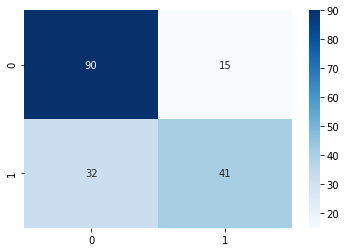

In [24]:
sns.heatmap(cm, annot=True, cmap='Blues')